# Analyzing Questionnaire

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import researchpy as rp 
from scipy import stats
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../data/antibiotic_resistance_cleaned_data.csv')
print(df.shape)

(463, 24)


In [4]:
# remove > 25 age limit 
gradstd_df = df[df['age_of_participant'] > 24]
gradstd_df.to_csv("../data/gradstd.csv", index=False)

In [5]:
gradstd_df = pd.read_csv('../data/gradstd.csv')
print(gradstd_df.shape)

(75, 24)


In [6]:
# discarded observations 
df.shape[0] - gradstd_df.shape[0]

388

In [7]:
gradstd_df.head() 

,age_of_participant,gender,academic_status,field_of_education,do_you_know_about_how_antibiotics_differ_from_other_drugs,pick_the_most_appropriate_definition_of_antibiotics,how_can_you_identify_an_antibiotic,what_is_your_idea_about_the_importance_of_antibiotics,what_is_the_most_dangerous_impact_of_antibiotics,what_is_your_opinion_about_antibiotic_usage,...,what_type_of_movement_on_public_health_issues_do_you_think_will_be_effective_in_setting_malpractices_right,why_do_you_think_public_health_issues_don’t_get_due_importance_in_public_opinion,how_many_antibiotics_have_you_taken_over_the_past_3_years,what_was_the_pattern_of_antibiotic_use,what_was_the_formulation_of_the_product_used,what_was_the_best_experience_with_the_consumption_of_antibiotics,what_was_the_worst_experience_with_the_consumption_of_antibiotics,how_did_you_come_to_consume_the_antibiotic,have_you_experienced_treatment_failure_from_antibiotic_consumption,what_was_your_understanding_of_treatment_failure
0,26,Male,Master,English,No,Medicine used to treat fever,From the pharmaceutical composition,They are the reason hospitalization has been r...,Antibiotic consumption damages health,Antibiotics should be used with proper restric...,...,Movement in media to form public opinion,Our people are not educated enough to understa...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28,Male,B.Sc & M.Sc in Microbiology,Microbiology,Yes,Medicine used to treat infections,From the pharmaceutical composition,They are the reason infectious diseases have b...,Antibiotic usage spreads antibiotic resistance,Antibiotics must be restricted because of the ...,...,Citizen movement from all people,Our government does not endorse forming public...,I don’t remember,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26,Male,Studying ( Masters),Pharmacy,Yes,Medicine used to treat infections,From the pharmaceutical composition,They are the reason infectious diseases have b...,Antibiotic consumption damages health,Antibiotics should be used with proper restric...,...,"Professional movement by doctors, pharmaceutic...",Our people are not educated enough to understa...,I know precisely,I took multiple antibiotics multiple times (আম...,Tablet,"I recovered from the symptoms quickly, which w...",Side-effects,A non-registered medical professional recomme...,No,NaN
3,30,Female,Post graduate,Language & Linguistics,Yes,Medicine used to treat infections,From the datasheet with the medicine,They are the reason infectious diseases have b...,Antibiotic usage spreads antibiotic resistance,Antibiotics should be used with proper restric...,...,Movement in media to form public opinion,Our people are not educated enough to understa...,I know precisely,I took multiple antibiotics multiple times (আম...,Tablet,"I recovered from the symptoms quickly, which w...",Side-effects,A registered physician prescribed it for the s...,Yes,I didn’t consume antibiotic on time and didn’t...
4,32,Male,NationalUniversity,Msc,Yes,Medicine used to treat infections,From the pharmaceutical composition,They are the reason infectious diseases have b...,Antibiotic usage spreads antibiotic resistance,Antibiotics should be used with proper restric...,...,"Professional movement by doctors, pharmaceutic...",Our health professionals are not active in dev...,I know precisely,I took multiple antibiotics multiple times (আম...,Oral,"I recovered from the symptoms quickly, which w...",Side-effects,A registered physician prescribed it for the s...,No,NaN


## Exploring Data 

In [8]:
df.columns

Index(['age_of_participant', 'gender', 'academic_status', 'field_of_education',
       'do_you_know_about_how_antibiotics_differ_from_other_drugs',
       'pick_the_most_appropriate_definition_of_antibiotics',
       'how_can_you_identify_an_antibiotic',
       'what_is_your_idea_about_the_importance_of_antibiotics',
       'what_is_the_most_dangerous_impact_of_antibiotics',
       'what_is_your_opinion_about_antibiotic_usage',
       'what_is_your_perception_of_drug-resistant_germs',
       'do_you_have_idea_about_antibiotic_resistance_as_a_threat_to_public_health',
       'choose_a_statement_that_you_feel_is_the_best_strategy_to_face_antibiotic-resistance',
       'which_of_the_strategies_have_you_heard_about_against_antibiotic_resistance',
       'what_type_of_movement_on_public_health_issues_do_you_think_will_be_effective_in_setting_malpractices_right',
       'why_do_you_think_public_health_issues_don’t_get_due_importance_in_public_opinion',
       'how_many_antibiotics_have_you_t

## Section-1: Demographics

In [9]:
# summary of age 
rp.codebook(gradstd_df['age_of_participant'])

Variable: age_of_participant    Data Type: int64 

 Number of Obs.: 75 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 9 

 Range: [25, 34] 
 Mean: 27.13 
 Standard Deviation: 2.26 
 Mode: 25 
 10th Percentile: 25.0 
 25th Percentile: 25.0 
 50th Percentile: 26.0 
 75th Percentile: 28.0 
 90th Percentile: 30.0 







In [11]:
# summary of gender 
rp.summary_cat(gradstd_df['gender'])

,Variable,Outcome,Count,Percent
0,gender,Male,52,69.33
1,,Female,23,30.67


In [47]:
# summary of academic status 
rp.summary_cat(gradstd_df['academic_status'])

,Variable,Outcome,Count,Percent
0,academic_status,Student,14,3.61
1,,BSc,14,3.61
2,,HSC,14,3.61
3,,Bsc,8,2.06
4,,Student,7,1.80
...,...,...,...,...
278,,B.Sc(Appeared),1,0.26
279,,"Honours 4th year,at economics",1,0.26
280,,School,1,0.26
281,,B.Sc senior year,1,0.26


In [18]:
# summary of field of education 
rp.summary_cat(gradstd_df['field_of_education'])

,Variable,Outcome,Count,Percent
0,field_of_education,Microbiology,38,9.79
1,,Microbiology,26,6.70
2,,Science,7,1.80
3,,Economics,7,1.80
4,,Science,6,1.55
...,...,...,...,...
240,,Territory,1,0.26
241,,Animal husbandry,1,0.26
242,,Architecture,1,0.26
243,,Mechanical Engineer,1,0.26


In [5]:
df.shape

(463, 24)

In [6]:
df.dtypes

age_of_participant                                                                                             int64
gender                                                                                                        object
academic_status                                                                                               object
field_of_education                                                                                            object
do_you_know_about_how_antibiotics_differ_from_other_drugs                                                     object
pick_the_most_appropriate_definition_of_antibiotics                                                           object
how_can_you_identify_an_antibiotic                                                                            object
what_is_your_idea_about_the_importance_of_antibiotics                                                         object
what_is_the_most_dangerous_impact_of_antibiotics                

In [7]:
df.columns[df.dtypes == 'object']

Index(['gender', 'academic_status', 'field_of_education',
       'do_you_know_about_how_antibiotics_differ_from_other_drugs',
       'pick_the_most_appropriate_definition_of_antibiotics',
       'how_can_you_identify_an_antibiotic',
       'what_is_your_idea_about_the_importance_of_antibiotics',
       'what_is_the_most_dangerous_impact_of_antibiotics',
       'what_is_your_opinion_about_antibiotic_usage',
       'what_is_your_perception_of_drug-resistant_germs',
       'do_you_have_idea_about_antibiotic_resistance_as_a_threat_to_public_health',
       'choose_a_statement_that_you_feel_is_the_best_strategy_to_face_antibiotic-resistance',
       'which_of_the_strategies_have_you_heard_about_against_antibiotic_resistance',
       'what_type_of_movement_on_public_health_issues_do_you_think_will_be_effective_in_setting_malpractices_right',
       'why_do_you_think_public_health_issues_don’t_get_due_importance_in_public_opinion',
       'how_many_antibiotics_have_you_taken_over_the_past_3_y

__Insights__

- Most of the data were in objects/categorical data 
- One of theme was integer/numeric data 


In [15]:
rp_results = rp.summary_cat(df[['gender', 'academic_status', 'field_of_education',
       'do_you_know_about_how_antibiotics_differ_from_other_drugs',
       'pick_the_most_appropriate_definition_of_antibiotics',
       'how_can_you_identify_an_antibiotic',
       'what_is_your_idea_about_the_importance_of_antibiotics',
       'what_is_the_most_dangerous_impact_of_antibiotics',
       'what_is_your_opinion_about_antibiotic_usage',
       'what_is_your_perception_of_drug-resistant_germs',
       'do_you_have_idea_about_antibiotic_resistance_as_a_threat_to_public_health',
       'choose_a_statement_that_you_feel_is_the_best_strategy_to_face_antibiotic-resistance',
       'which_of_the_strategies_have_you_heard_about_against_antibiotic_resistance',
       'what_type_of_movement_on_public_health_issues_do_you_think_will_be_effective_in_setting_malpractices_right',
       'why_do_you_think_public_health_issues_don’t_get_due_importance_in_public_opinion',
       'how_many_antibiotics_have_you_taken_over_the_past_3_years',
       'what_was_the_pattern_of_antibiotic_use',
       'what_was_the_formulation_of_the_product_used',
       'what_was_the_best_experience_with_the_consumption_of_antibiotics',
       'what_was_the_worst_experience_with_the_consumption_of_antibiotics',
       'how_did_you_come_to_consume_the_antibiotic',
       'have_you_experienced_treatment_failure_from_antibiotic_consumption',
       'what_was_your_understanding_of_treatment_failure']])

In [16]:
rp_results 

,Variable,Outcome,Count,Percent
0,gender,Male,285,61.56
1,,Female,178,38.44
2,academic_status,Student,17,3.67
3,,BSc,14,3.02
4,,HSC,14,3.02


In [8]:
# Count of each row
df.count() 

age_of_participant                                                                                            463
gender                                                                                                        463
academic_status                                                                                               463
field_of_education                                                                                            462
do_you_know_about_how_antibiotics_differ_from_other_drugs                                                     463
pick_the_most_appropriate_definition_of_antibiotics                                                           463
how_can_you_identify_an_antibiotic                                                                            463
what_is_your_idea_about_the_importance_of_antibiotics                                                         463
what_is_the_most_dangerous_impact_of_antibiotics                                        

## Missing Values 

In [9]:
df.isnull().sum() 

age_of_participant                                                                                              0
gender                                                                                                          0
academic_status                                                                                                 0
field_of_education                                                                                              1
do_you_know_about_how_antibiotics_differ_from_other_drugs                                                       0
pick_the_most_appropriate_definition_of_antibiotics                                                             0
how_can_you_identify_an_antibiotic                                                                              0
what_is_your_idea_about_the_importance_of_antibiotics                                                           0
what_is_the_most_dangerous_impact_of_antibiotics                                        

__Insights__

- Last 4 columns have a lot of missing values.

## Distribution of Age 

In [10]:
df['age_of_participant'] = df['age_of_participant'].astype('int')

In [11]:
# Median age of participant
print("Median age of participant: ", df['age_of_participant'].median())

Median age of participant:  22.0


In [12]:
# Summary 
df['age_of_participant'].describe() 

count    463.000000
mean      22.084233
std        2.912770
min       14.000000
25%       20.000000
50%       22.000000
75%       23.000000
max       34.000000
Name: age_of_participant, dtype: float64

__Insights__

- In this study, 75%(most of them) participants are less than 23 years old. 

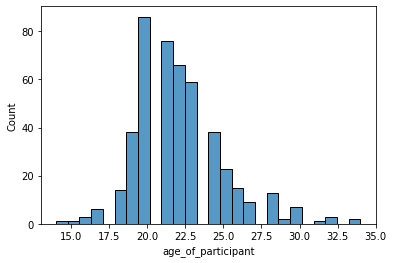

In [13]:
sns.histplot(df['age_of_participant'])

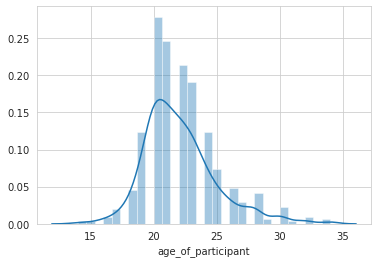

In [11]:
# check normality 
sns.distplot(df['age_of_participant'], kde=True, bins=30)

__Insights__ 

- Not proper normal distribution, little bit positively skewed.

## Normality Test - Shapiro-Wilk Test

- $H_0$: The sample has a Gaussian/Normal distribution.
- $H_a$: The sample does not have a Gaussian/Normal distribution.

In [12]:
stat, p = stats.shapiro(df['age_of_participant'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.933, p=0.000
Probably not Gaussian


In [23]:
# age distribution by sex 
df.groupby('gender').age_of_participant.median() 

gender
Female    21
Male      22
Name: age_of_participant, dtype: int64

__Insights__
- Median age of female 21 years.
- Median age of male 22 years. 

In [37]:
df['age_of_participant'].mean() 

22.084233261339094

In [40]:
print("Skew:", stats.skew(df['age_of_participant']))
print("Kurto:", stats.kurtosis(df['age_of_participant']))

Skew: 0.999764918884061
Kurto: 1.7791286820876566


### Inference
- $H_0$: The average age of participant is 22
- $H_a$: The average age of participant is not 22

Where, 30 is hypothesis mean

In [4]:
stat, p = stats.ttest_1samp(df['age_of_participant'], np.mean(df['age_of_participant']))

In [5]:
if p < 0.05: 
    print("Reject H0 Hypothesis.")
else: 
    print("Fail to Reject H0 Hypothesis, We accaept H0 Hypothesis.")

Fail to Reject H0 Hypothesis, We accaept H0 Hypothesis.


## Checking for Outliers
- Univariate Analysis
- Multivariate Analysis

## Methods
- Boxplot(Univariate)
- Scatterplot (Multivariate)
- Z-score
- IQR Interquartile Range

In [24]:
# outlier detections
df['age_of_participant'].describe() 

count    463.000000
mean      22.084233
std        2.912770
min       14.000000
25%       20.000000
50%       22.000000
75%       23.000000
max       34.000000
Name: age_of_participant, dtype: float64

In [27]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [28]:
IQR = q3 - q1 

In [29]:
IQR

age_of_participant    3.0
dtype: float64

In [32]:
(q1 - 1.5*IQR, q3 + 1.5*IQR)

(age_of_participant    15.5
 dtype: float64,
 age_of_participant    27.5
 dtype: float64)

__Insights__

- Maximum age of participants was 34. The range is (15.5-27.5), 34 is not in this range so it's an outliers.

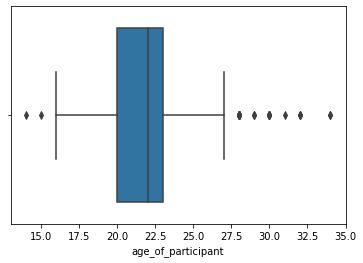

In [16]:
# any outliers?
sns.boxplot(x='age_of_participant', data=df)

__Insights__

- Outliers was present.

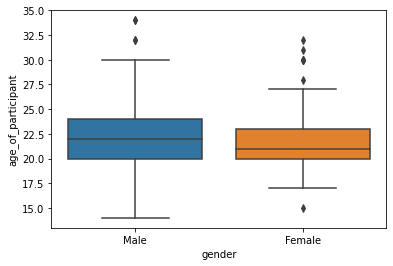

In [18]:
sns.boxplot(x='gender', y='age_of_participant', data=df)

## Academic Status

In [33]:
df['academic_status'].value_counts() 

Student                                        17
BSc                                            14
HSC                                            14
Bsc                                             9
Graduate                                        7
                                               ..
HSC passed and studing in Hons 1st year.        1
Bsc ( Engineering) 1st year 2nd semester        1
Honours 1 st year                               1
BSc 1st year                                    1
Honours 4th year,at economics                   1
Name: academic_status, Length: 333, dtype: int64

## Field of Education

In [34]:
df['field_of_education'].value_counts() 

Microbiology                      45
Microbiology                      32
Economics                          9
Science                            7
CSE                                6
                                  ..
RMG sector                         1
Satkhira medical College           1
Department of Chemistry            1
English Literature                 1
NMC                                1
Name: field_of_education, Length: 284, dtype: int64

# Analyzing Questions 

## Question #1: Do you know about how antibiotics differ from other drugs? 

In [17]:
df['do_you_know_about_how_antibiotics_differ_from_other_drugs'].value_counts(normalize=True) * 100 

Yes     74.946004
No      25.053996
Name: do_you_know_about_how_antibiotics_differ_from_other_drugs, dtype: float64

In [ ]:
# proportion 
df['Do you know about how antibiotics differ from other drugs?'].value_counts(normalize=True) 

In [ ]:
# % 
df['Do you know about how antibiotics differ from other drugs?'].value_counts(normalize=True) * 100

In [ ]:
sns.countplot(x='Do you know about how antibiotics differ from other drugs?',data=df, hue='Gender')

## Question #2: Pick the most appropriate definition of antibiotics

In [ ]:
df['Pick the most appropriate definition of antibiotics'].value_counts() 

In [ ]:
df['Pick the most appropriate definition of antibiotics'].value_counts(normalize=True)

In [ ]:
df['Pick the most appropriate definition of antibiotics'].value_counts(normalize=True) * 100 

## Question #3: How can you identify an antibiotic?

In [ ]:
df['How can you identify an antibiotic?'].value_counts() 

In [ ]:
df['How can you identify an antibiotic?'].value_counts(normalize=True) 

In [ ]:
df['How can you identify an antibiotic?'].value_counts(normalize=True) * 100

## Question #4: What is your idea about the importance of antibiotics?

In [ ]:
df['What is your idea about the importance of antibiotics?'].value_counts()

In [ ]:
df['What is your idea about the importance of antibiotics?'].value_counts(normalize=True)

In [ ]:
df['What is your idea about the importance of antibiotics?'].value_counts(normalize=True) * 100

## Question #5:  What is the most dangerous impact of antibiotics?

In [ ]:
df['What is the most dangerous impact of antibiotics?'].value_counts() 

In [ ]:
df['What is the most dangerous impact of antibiotics?'].value_counts(normalize=True) 

In [ ]:
df['What is the most dangerous impact of antibiotics?'].value_counts(normalize=True) * 100

## Question #6: What is your opinion about antibiotic usage?

In [ ]:
df['What is your opinion about antibiotic usage?'].value_counts() 

In [ ]:
df['What is your opinion about antibiotic usage?'].value_counts(normalize=True) 

In [ ]:
df['What is your opinion about antibiotic usage?'].value_counts(normalize=True)*100

## Question #7: What is your perception of drug-resistant germs?

In [ ]:
df['What is your perception of drug-resistant germs?'].value_counts() 

In [ ]:
df['What is your perception of drug-resistant germs?'].value_counts(normalize=True) 

In [ ]:
df['What is your perception of drug-resistant germs?'].value_counts(normalize=True)*100

## Question #8: Do you have idea about antibiotic resistance as a threat to public health?

In [ ]:
df['Do you have idea about antibiotic resistance as a threat to public health?'].value_counts() 

In [ ]:
df['Do you have idea about antibiotic resistance as a threat to public health?'].value_counts(normalize=True) 

In [ ]:
df['Do you have idea about antibiotic resistance as a threat to public health?'].value_counts(normalize=True)*100

## Question #9: Choose a statement that you feel is the best strategy to face antibiotic-resistance

In [ ]:
df['Choose a statement that you feel is the best strategy to face antibiotic-resistance'].value_counts() 

In [ ]:
df['Choose a statement that you feel is the best strategy to face antibiotic-resistance'].value_counts(normalize=True) 

In [ ]:
df['Choose a statement that you feel is the best strategy to face antibiotic-resistance'].value_counts(normalize=True)*100

## Question #10: Which of the strategies have you heard about against antibiotic resistance?

In [ ]:
df['Which of the strategies have you heard about against antibiotic resistance?'].value_counts()

In [ ]:
df['Which of the strategies have you heard about against antibiotic resistance?'].value_counts(normalize=True)

In [ ]:
df['Which of the strategies have you heard about against antibiotic resistance?'].value_counts(normalize=True)*100

## Question #11: What type of movement on public health issues do you think will be effective in setting malpractices right?

In [ ]:
df['What type of movement on public health issues do you think will be effective in setting malpractices right?'].value_counts()

In [ ]:
df['What type of movement on public health issues do you think will be effective in setting malpractices right?'].value_counts(normalize=True)

In [ ]:
df['What type of movement on public health issues do you think will be effective in setting malpractices right?'].value_counts(normalize=True)*100

## Question #12: Why do you think public health issues don’t get due importance in public opinion?

In [ ]:
df['Why do you think public health issues don’t get due importance in public opinion?'].value_counts() 

In [ ]:
df['Why do you think public health issues don’t get due importance in public opinion?'].value_counts(normalize=True) 

In [ ]:
df['Why do you think public health issues don’t get due importance in public opinion?'].value_counts(normalize=True)*100

## Question #13: How many antibiotics have you taken over the past 3 years?

In [ ]:
df['How many antibiotics have you taken over the past 3 years?'].value_counts() 

In [ ]:
df['How many antibiotics have you taken over the past 3 years?'].value_counts(normalize=True) 

In [ ]:
df['How many antibiotics have you taken over the past 3 years?'].value_counts(normalize=True)*100

## Question #14: What was the pattern of antibiotic use?

In [ ]:
df['What was the pattern of antibiotic use?'].value_counts() 

In [ ]:
df['What was the pattern of antibiotic use?'].value_counts(normalize=True) 

In [ ]:
df['What was the pattern of antibiotic use?'].value_counts(normalize=True)*100

## Question #15: What was the formulation of the product used?

In [ ]:
df['What was the formulation of the product used?'].value_counts() 

In [ ]:
df['What was the formulation of the product used?'].value_counts(normalize=True) 

In [ ]:
df['What was the formulation of the product used?'].value_counts(normalize=True)*100

## Question #16: What was the best experience with the consumption of antibiotics?

In [ ]:
df['What was the best experience with the consumption of antibiotics?'].value_counts() 

In [ ]:
df['What was the best experience with the consumption of antibiotics?'].value_counts(normalize=True) 

In [ ]:
df['What was the best experience with the consumption of antibiotics?'].value_counts(normalize=True)*100

## Question #16: What was the worst experience with the consumption of antibiotics?

In [ ]:
df['What was the worst experience with the consumption of antibiotics?'].value_counts() 

In [ ]:
df['What was the worst experience with the consumption of antibiotics?'].value_counts(normalize=True)

In [ ]:
df['What was the worst experience with the consumption of antibiotics?'].value_counts(normalize=True)*100

## Question #17:How did you come to consume the antibiotic?
__TODO__
- Fix Errors!

In [ ]:
df['How did you come to consume the antibiotic?'].value_counts() 

In [ ]:
df['How did you come to consume the antibiotic?'].value_counts(normalize=True) 

In [ ]:
df['How did you come to consume the antibiotic?'].value_counts(normalize=True)*100

## Question #18:Have you experienced treatment failure from antibiotic consumption?

In [ ]:
df['Have you experienced treatment failure from antibiotic consumption?'].value_counts() 

In [ ]:
df['Have you experienced treatment failure from antibiotic consumption?'].value_counts(normalize=True) 

In [ ]:
df['Have you experienced treatment failure from antibiotic consumption?'].value_counts(normalize=True)*100

## Question #19:What was your understanding of treatment failure?

In [ ]:
df['What was your understanding of treatment failure?'].value_counts()

In [ ]:
df['What was your understanding of treatment failure?'].value_counts(normalize=True)

In [ ]:
df['What was your understanding of treatment failure?'].value_counts(normalize=True)*100